# Conflict Link Prediction

In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import itertools
import time
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# Create Edge List

In [2]:
df = pd.read_csv('MIDB_3.02.csv')
df .shape

(5600, 19)

In [3]:
df

,dispnum,stabb,ccode,stday,stmon,styear,endday,endmon,endyear,sidea,revstate,revtype1,revtype2,fatality,fatalpre,hiact,hostlev,orig,version
0,2,UKG,200,-9,7,1902,24,1,1903,0,1,1,-9,0,0,0,1,1,3.02
1,2,USA,2,-9,7,1902,24,1,1903,1,1,1,-9,0,0,7,3,1,3.02
2,3,YUG,345,2,5,1913,25,10,1913,0,0,0,-9,0,0,0,1,1,3.02
3,3,AUH,300,2,5,1913,25,10,1913,1,1,2,-9,0,0,8,3,1,3.02
4,4,ALB,339,15,5,1946,13,11,1946,1,0,0,-9,0,0,16,4,1,3.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,4343,UAE,696,24,11,2000,28,11,2000,0,0,0,0,0,0,0,1,1,3.02
5596,4343,UKG,200,24,11,2000,28,11,2000,0,0,0,0,0,0,0,1,1,3.02
5597,4343,UKR,369,24,11,2000,28,11,2000,0,0,0,0,0,0,0,1,1,3.02
5598,4343,USA,2,24,11,2000,28,11,2000,0,0,0,0,0,0,0,1,1,3.02


In [4]:
df =df.loc[df['styear'] > 1969]

In [5]:
#split dataframe into train and test period
train_df = df.loc[df['styear'] < 1990]
test_df = df.loc[df['styear'] > 1990]

In [6]:
#hostlev, orig

In [7]:
##resolve matrix
edges_df = pd.DataFrame(columns = ['Node1', 'Node2', 'Occurances', 'Year', 'Total years'])

In [8]:
disputes = train_df['dispnum'].unique()
for d in disputes: 
    temp = train_df.loc[df['dispnum'] == d]
    temp_a = temp.loc[temp['sidea'] == 1, 'stabb']
    temp_b = temp.loc[temp['sidea'] == 0, 'stabb']
    for a in temp_a:
        a_df = temp.loc[temp['stabb']==a]
        if a_df['orig'].iloc[0] == 1:
            for b in temp_b:
                b_df = temp.loc[temp['stabb']==b]
                if b_df['orig'].iloc[0] == 1:
                    #display(b_df)
                    #display(a_df)
                    #print('--')
                #if not already in edges
                    l = [a,b]
                    year = max(a_df['styear'].iloc[0], b_df['styear'].iloc[0])
                    duration = min(a_df['endyear'].iloc[0], b_df['endyear'].iloc[0])-year
                    if a < b:
                        edges_df = edges_df.append(pd.DataFrame({'Node1':a, 'Node2':b, 'Occurances':1, 'Year':year, 'Total years':duration}, index = [0]))
                    else: 
                        edges_df = edges_df.append(pd.DataFrame({'Node1':b, 'Node2':a, 'Occurances':1, 'Year':year, 'Total years':duration}, index = [0]))

In [9]:
edges_df = edges_df.reset_index(drop = True)

In [10]:
edges_df.shape

(657, 5)

In [11]:
#Merge double edges
edges_df = edges_df.groupby(['Node1', 'Node2'], as_index = False).agg({'Occurances': sum, 'Year': min, 'Total years': sum})

In [12]:
edges_df

,Node1,Node2,Occurances,Year,Total years
0,AFG,IRN,4,1979,0
1,AFG,PAK,4,1974,7
2,ALB,YUG,1,1976,0
3,ALG,ISR,1,1970,0
4,ALG,MAA,1,1975,0
5,ALG,MOR,4,1975,0
6,ALG,SPN,1,1975,0
7,ANG,BOT,1,1988,0
8,ANG,FRN,1,1978,0
9,ANG,MOR,1,1978,0


In [14]:
u1 = list(edges_df['Node1'].unique())
u1.extend(list(edges_df['Node2'].unique()))
u1 = set(u1)

In [15]:
len(u1)

130

In [16]:
train_edges = edges_df.copy()

### Add Test Edges

In [17]:
disputes = test_df['dispnum'].unique()
test_pairs = []
for d in disputes: 
    temp = test_df.loc[df['dispnum'] == d]
    temp_a = temp.loc[temp['sidea'] == 1, 'stabb']
    temp_b = temp.loc[temp['sidea'] == 0, 'stabb']
    for a in temp_a:
        a_df = temp.loc[temp['stabb']==a]
        if a_df['orig'].iloc[0] == 1 and a in u1:
            for b in temp_b:
                b_df = temp.loc[temp['stabb']==b]
                if b_df['orig'].iloc[0] == 1 and b in u1:
                    #display(b_df)
                    #display(a_df)
                    #print('--')
                    l = [a,b]
                    year = max(a_df['styear'].iloc[0], b_df['styear'].iloc[0])
                    duration = min(a_df['endyear'].iloc[0], b_df['endyear'].iloc[0])-year
                    if a < b:
                        test_pairs.append((a,b))
                        edges_df = edges_df.append(pd.DataFrame({'Node1':a, 'Node2':b, 'Occurances':1, 'Year':year, 'Total years':duration}, index = [0]))
                    else: 
                        test_pairs.append((b,a))
                        edges_df = edges_df.append(pd.DataFrame({'Node1':b, 'Node2':a, 'Occurances':1, 'Year':year, 'Total years':duration}, index = [0]))

In [18]:
edges_df = edges_df.reset_index(drop = True)

In [19]:
edges_df = edges_df.groupby(['Node1', 'Node2'], as_index = False).agg({'Occurances': sum, 'Year': min, 'Total years': sum})

In [20]:
edges_df.shape

(311, 5)

In [21]:
u1 = list(edges_df['Node1'].unique())
u1.extend(list(edges_df['Node2'].unique()))
u1 = set(u1)

In [22]:
len(u1)

130

### Find positive labelled examples

In [23]:
pairs = []
test_pairs = set(test_pairs)
for t in test_pairs:
    if train_edges.loc[(train_edges['Node1'] == t[0])&(train_edges['Node2'] == t[1])].shape[0] == 0: 
        pairs.append(t)
    

In [24]:
pairs

[('DEN', 'YUG'),
 ('USA', 'VEN'),
 ('AUL', 'INS'),
 ('BNG', 'MYA'),
 ('AFG', 'UKG'),
 ('UKG', 'YUG'),
 ('CHN', 'INS'),
 ('CHL', 'UKG'),
 ('AFG', 'USA'),
 ('MOR', 'YUG'),
 ('INS', 'NEW'),
 ('ICE', 'YUG'),
 ('ANG', 'CON'),
 ('ANG', 'ZAM'),
 ('SUD', 'USA'),
 ('IND', 'PNG'),
 ('MZM', 'SWA'),
 ('TUR', 'YUG'),
 ('FRN', 'ZAI'),
 ('BEL', 'ZAI'),
 ('ETH', 'KEN'),
 ('AFG', 'FRN'),
 ('USA', 'YUG'),
 ('NIC', 'SAL'),
 ('CAN', 'SPN'),
 ('HUN', 'YUG'),
 ('ARG', 'YUG'),
 ('ARG', 'HAI'),
 ('SWD', 'YUG'),
 ('JOR', 'YUG'),
 ('RUM', 'YUG'),
 ('LBR', 'NIG'),
 ('JPN', 'TAW'),
 ('EGY', 'IRN'),
 ('ITA', 'YUG'),
 ('IRQ', 'JPN'),
 ('CAN', 'YUG'),
 ('GRC', 'YUG'),
 ('FRN', 'YUG'),
 ('POR', 'YUG'),
 ('BEL', 'YUG'),
 ('SPN', 'YUG'),
 ('FRN', 'HAI'),
 ('POL', 'YUG'),
 ('QAT', 'SAU'),
 ('GUI', 'LBR'),
 ('UAE', 'YUG'),
 ('LBR', 'USA'),
 ('NTH', 'YUG'),
 ('AUL', 'NOR'),
 ('EGY', 'SUD'),
 ('NOR', 'YUG'),
 ('ALB', 'GRC'),
 ('CHN', 'PRK'),
 ('JPN', 'PRK'),
 ('MAL', 'SIN'),
 ('CAN', 'HAI'),
 ('PHI', 'TAW'),
 ('HAI', 'USA'

In [25]:
len(pairs)

60

### Save edge list for visualisation

In [26]:
train_edges.to_excel('Conflict Train.xlsx')
edges_df.to_excel('Conflict complete.xlsx')

## Make Graphs 

In [26]:
edges_df.columns

Index(['Node1', 'Node2', 'Occurances', 'Year', 'Total years'], dtype='object')

In [27]:
train_g = nx.from_pandas_edgelist(train_edges, source='Node1', target='Node2', edge_attr=['Occurances', 'Year', 'Total years'])
g = nx.from_pandas_edgelist(edges_df, source='Node1', target='Node2', edge_attr=['Occurances', 'Year', 'Total years'])

## Fetch labelled examples

In [28]:
from networkx.classes.function import non_neighbors
temp = nx.Graph(train_g)
pairs_df = pd.DataFrame()
p1 = []; p2 = []
for n in temp.nodes:
    for p in non_neighbors(temp, n):
        if n < p:
            p1.append(n)
            p2.append(p)
        else: 
            p1.append(p)
            p2.append(n)
    temp = nx.Graph(temp)
    temp.remove_node(n)

In [29]:
pairs_df['Node1'] = p1
pairs_df['Node2'] = p2

In [30]:
y = []
for i, row in pairs_df.iterrows():
    if (row['Node1'], row['Node2']) in pairs:
        y.append(True)
    else: 
        y.append(False)
pairs_df['y'] = y

In [31]:
len(pairs_df)

8134

In [32]:
pairs_df['y'].value_counts()

False    8074
True       60
Name: y, dtype: int64

## Create features from training edges

In [33]:
l = list(train_edges['Node1'].unique())
l.extend(train_edges['Node2'].unique())
l = set(l)

In [34]:
len(l)

130

In [35]:
nodes = pd.DataFrame()
nodes['Node'] = list(l)

### Feature: Sum of Papers

In [37]:
# sum of papers 
sum_papers = []; sum_papers2 =[]
for i, row in nodes.iterrows():
    #get all edges in which row[node] is in
    temp = train_edges[(train_edges['Node1'] == row['Node']) | (train_edges['Node2'] == row['Node'])]
    sum_papers.append(sum(temp['Occurances']))
    if sum(temp['Total years']) == 0: 
        sum_papers2.append(0)
    else:
        sum_papers2.append(sum(temp['Occurances'])/sum(temp['Total years']))#only if weights differ from one

In [38]:
nodes['Sum of Papers'] = sum_papers

In [39]:
nodes['Sum of Papers normalised'] = sum_papers2

In [40]:
nodes

,Node,Sum of Papers,Sum of Papers normalised
0,LES,1,1.000000
1,GHA,2,0.000000
2,SEN,6,6.000000
3,EGY,19,3.166667
4,RWA,3,0.000000
5,POR,10,5.000000
6,SIN,2,2.000000
7,MAL,7,3.500000
8,ZAI,13,4.333333
9,SOM,14,2.333333


### Features: Sum of Neighbours

In [41]:
from networkx.classes.function import neighbors
temp = nx.Graph(train_g)
sum_neighbours = []

for i, row in nodes.iterrows():
    sum_neighbours.append(temp.degree(row['Node'])) #len([n for n in temp.neighbors(row['Node'])])) # degree


In [42]:
nodes['Sum of Neighbours'] = sum_neighbours

In [43]:
from networkx.classes.function import neighbors
temp = nx.Graph(train_g)
sum_neighbours = []

for i, row in nodes.iterrows():
    sum_neighbours.append(temp.degree(row['Node'],weight = 'Occurances')) #len([n for n in temp.neighbors(row['Node'])])) # degree
nodes['Weighted Sum of Neighbours'] = sum_neighbours

In [44]:
# add sum of neighbours and sum of papers to pairs_df
neighbours = []
wneighbours = []
papers =[]
papers2 = []
for i, row in pairs_df.iterrows():
    temp = nodes.loc[(nodes['Node'] == row['Node1'])|(nodes['Node'] == row['Node2'])]
    neighbours.append(temp['Sum of Neighbours'].sum())
    wneighbours.append(temp['Weighted Sum of Neighbours'].sum())
    papers.append(temp['Sum of Papers'].sum())
    papers2.append(temp['Sum of Papers normalised'].sum())

In [45]:
pairs_df['Sum of Neighbours'] = neighbours
pairs_df['Weighted Sum of Neighbours'] = wneighbours
pairs_df['Sum of Papers'] = papers
pairs_df['Sum of Papers 2'] = papers2

### Feature: Shortest Distance

In [46]:
pairs_df.columns

Index(['Node1', 'Node2', 'y', 'Sum of Neighbours', 'Weighted Sum of Neighbours', 'Sum of Papers', 'Sum of Papers 2'], dtype='object')

In [47]:
shortest_distance = [] 
second_shortest_distance = []
for i, row in pairs_df.iterrows():
    try:
        done = False
        X = nx.shortest_simple_paths(train_g, row['Node1'], row['Node2'])
        for counter, path in enumerate(X):
            if counter == 0: 
                shortest_distance.append(len(path))
            elif counter == 1: 
                second_shortest_distance.append(len(path))
                done = True
            else:
                break
        if not done: 
            second_shortest_distance.append(np.inf)
    except nx.NetworkXNoPath:
        shortest_distance.append(np.inf)
        second_shortest_distance.append(np.inf)

In [48]:
pairs_df.shape, len(shortest_distance), len(second_shortest_distance)

((8134, 7), 8134, 8134)

In [49]:
pairs_df['shortest distance'] = shortest_distance
pairs_df['second shortest distance'] = second_shortest_distance

# Sampling Approaches

In [50]:
pairs_df['y'].value_counts()

False    8074
True       60
Name: y, dtype: int64

In [52]:
degreees = [t[1] for t in train_g.degree]
degreees
np.mean(degreees)

3.8615384615384616

In [53]:
s = list(pairs_df['Node1'].unique())
s.extend(list(pairs_df['Node2'].unique()))
len(set(s))

130

In [102]:
#random undersampling
import random
random.seed(42)
neg_indices = pairs_df.loc[pairs_df['y']== False].index.to_list()
neg_sample = random.sample(neg_indices, 60)
pairs_df_sample = pairs_df.loc[neg_sample]
pairs_df_sample = pd.concat([pairs_df_sample, pairs_df.loc[pairs_df['y']== True]])

In [52]:
#neighbourhood sample
pairs_df_neighbourhood = pairs_df.loc[pairs_df['shortest distance'] == 3]

In [54]:
pairs_df_neighbourhood['y'].value_counts()

False    1227
True       40
Name: y, dtype: int64

In [59]:
import warnings
warnings.filterwarnings('ignore')

### Dummy Classifier

In [56]:
from sklearn import model_selection
from sklearn import metrics

In [110]:
def dummy(x):
    avg_acc = []; avg_precision =[]; avg_recall = []; avg_f1 = []; avg_auc = []
    for seed in [0,1,2,3,4]:
        acc =[]; precision = []; recall = []; f1 = []; auc = []
        cv = model_selection.StratifiedKFold(n_splits=5, shuffle = True, random_state = seed)
        for train_index, test_index in cv.split(x, x['y']):
            x_tr, x_te = x.iloc[train_index], x.iloc[test_index]
            if x_tr.loc[x_tr['y']==1,'y'].shape[0] <=  x_tr.loc[x_tr['y']==0,'y'].shape[0]:
                majority_class = 0
            else: 
                majority_class = 1
            print('majority class: ', majority_class)
            y_pred = [majority_class for i in range(len(x_te['y']))]
            y_te = x_te['y'].tolist()

            acc.append(metrics.accuracy_score(y_te, y_pred))
            precision.append(metrics.precision_score(y_te, y_pred))
            recall.append(metrics.recall_score(y_te, y_pred))
            f1.append(metrics.f1_score(y_te, y_pred))
            auc.append(metrics.roc_auc_score(y_te, y_pred))
        avg_acc.append(np.mean(acc))
        avg_precision.append(np.mean(precision))
        avg_recall.append(np.mean(recall))
        avg_f1.append(np.mean(f1))
        avg_auc.append(np.mean(auc))
    print('acc', avg_acc, np.mean(avg_acc))
    print('precision',avg_precision,  np.mean(avg_precision))
    print('recall',avg_recall, np.mean(avg_recall))
    print('f1', avg_f1,  np.mean(avg_f1))
    print('AUC',avg_auc, np.mean(avg_auc))

In [111]:
dummy(pairs_df[['Node1','Node2', 'y']])

majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
acc [0.9926235550001474, 0.9926235550001474, 0.9926235550001474, 0.9926235550001474, 0.9926235550001474] 0.9926235550001474
precision [0.0, 0.0, 0.0, 0.0, 0.0] 0.0
recall [0.0, 0.0, 0.0, 0.0, 0.0] 0.0
f1 [0.0, 0.0, 0.0, 0.0, 0.0] 0.0
AUC [0.5, 0.5, 0.5, 0.5, 0.5] 0.5


In [112]:
dummy(pairs_df_sample[['Node1','Node2', 'y']])

majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
acc [0.5, 0.5, 0.5, 0.5, 0.5] 0.5
precision [0.0, 0.0, 0.0, 0.0, 0.0] 0.0
recall [0.0, 0.0, 0.0, 0.0, 0.0] 0.0
f1 [0.0, 0.0, 0.0, 0.0, 0.0] 0.0
AUC [0.5, 0.5, 0.5, 0.5, 0.5] 0.5


In [113]:
dummy(pairs_df_neighbourhood[['Node1','Node2', 'y']])

majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
majority class:  0
acc [0.9684292427873393, 0.9684292427873393, 0.9684292427873393, 0.9684292427873393, 0.9684292427873393] 0.9684292427873393
precision [0.0, 0.0, 0.0, 0.0, 0.0] 0.0
recall [0.0, 0.0, 0.0, 0.0, 0.0] 0.0
f1 [0.0, 0.0, 0.0, 0.0, 0.0] 0.0
AUC [0.5, 0.5, 0.5, 0.5, 0.5] 0.5


### Similarity Measure

In [57]:
def jaccard(x, threshold = 0.5, verbose = True):
    avg_acc = []; avg_precision =[]; avg_recall = []; avg_f1 = []; avg_auc = []
    
    jaccard= {}
    for j in  list(nx.jaccard_coefficient(train_g)): 
        jaccard[(j[0], j[1])] = j[2]
    for seed in [0,1,2,3,4]:
        acc =[]; precision = []; recall = []; f1 = []; auc = []
        cv = model_selection.StratifiedKFold(n_splits=5, shuffle = True, random_state = seed)
        for train_index, test_index in cv.split(x, x['y']):
            x_tr, x_te = x.iloc[train_index], x.iloc[test_index]
            y_pred = []
            y_te = []
            for i, row in x_te.iterrows(): 
                if (row['Node1'], row['Node2']) in jaccard.keys():
                    key = (row['Node1'], row['Node2'])
                else: 
                    key = (row['Node2'], row['Node1'])
                if jaccard[key] < threshold:
                    y_pred.append(0)
                else: 
                    y_pred.append(1)
                y_te.append(row['y'])
            acc.append(metrics.accuracy_score(y_te, y_pred))
            precision.append(metrics.precision_score(y_te, y_pred))
            recall.append(metrics.recall_score(y_te, y_pred))
            f1.append(metrics.f1_score(y_te, y_pred))
            auc.append(metrics.roc_auc_score(y_te, y_pred))
        avg_acc.append(np.mean(acc))
        avg_precision.append(np.mean(precision))
        avg_recall.append(np.mean(recall))
        avg_f1.append(np.mean(f1))
        avg_auc.append(np.mean(auc))
    if verbose:
        print('acc', avg_acc, np.mean(avg_acc))
        print('precision',avg_precision,  np.mean(avg_precision))
        print('recall',avg_recall, np.mean(avg_recall))
        print('f1', avg_f1,  np.mean(avg_f1))
        print('AUC',avg_auc, np.mean(avg_auc))
    else:
        print('acc',np.mean(avg_acc))
        print('precision',np.mean(avg_precision))
        print('recall',np.mean(avg_recall))
        print('f1', np.mean(avg_f1))
        print('AUC',np.mean(avg_auc))  

In [115]:
for i in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    print(i)
    jaccard(pairs_df_sample[['Node1','Node2', 'y']],threshold = i, verbose =False)

0
acc 0.5
precision 0.5
recall 1.0
f1 0.6666666666666666
AUC 0.5
0.1
acc 0.7166666666666666
precision 0.856063492063492
recall 0.5166666666666667
f1 0.6340093996131148
AUC 0.7166666666666667
0.2
acc 0.6583333333333333
precision 0.952
recall 0.3333333333333333
f1 0.4804812332490351
AUC 0.6583333333333334
0.3
acc 0.5416666666666667
precision 0.73
recall 0.1
f1 0.17012087912087911
AUC 0.5416666666666667
0.4
acc 0.5249999999999999
precision 0.36
recall 0.05
f1 0.08492307692307693
AUC 0.5249999999999999
0.5
acc 0.5166666666666666
precision 0.27999999999999997
recall 0.03333333333333333
f1 0.05890109890109889
AUC 0.5166666666666666
0.6
acc 0.5
precision 0.0
recall 0.0
f1 0.0
AUC 0.5
0.7
acc 0.5
precision 0.0
recall 0.0
f1 0.0
AUC 0.5
0.8
acc 0.5
precision 0.0
recall 0.0
f1 0.0
AUC 0.5
0.9
acc 0.5
precision 0.0
recall 0.0
f1 0.0
AUC 0.5
1
acc 0.5
precision 0.0
recall 0.0
f1 0.0
AUC 0.5


In [117]:
jaccard(pairs_df[['Node1','Node2', 'y']], threshold = 0.1)

acc [0.8836969316220514, 0.8836990484225679, 0.8836964024219223, 0.8836991996226047, 0.8836978388222727] 0.8836978841822838
precision [0.03296865161817952, 0.032957709616962504, 0.03313047804478332, 0.03268256356292167, 0.032741283586477155] 0.03289613728586484
recall [0.5166666666666667, 0.5166666666666666, 0.5166666666666667, 0.5166666666666666, 0.5166666666666667] 0.5166666666666666
f1 [0.061965339755395, 0.061956754036923814, 0.06225462118917818, 0.06145906693806673, 0.0615717360189722] 0.06184150358770718
AUC [0.701545551501759, 0.7015465873299036, 0.7015452829537215, 0.7015466640579143, 0.7015459351418125] 0.7015460041970222


In [119]:
jaccard(pairs_df_sample[['Node1','Node2', 'y']], threshold = 0.1)

acc [0.7166666666666666, 0.7166666666666666, 0.7166666666666667, 0.7166666666666666, 0.7166666666666667] 0.7166666666666666
precision [0.8511111111111112, 0.8658730158730158, 0.82, 0.89, 0.8533333333333333] 0.856063492063492
recall [0.5166666666666667, 0.5166666666666667, 0.5166666666666667, 0.5166666666666667, 0.5166666666666666] 0.5166666666666667
f1 [0.6323571852983617, 0.643141186299081, 0.6210007639419404, 0.6456215404822216, 0.6279263220439691] 0.6340093996131148
AUC [0.7166666666666667, 0.7166666666666667, 0.7166666666666666, 0.7166666666666667, 0.7166666666666668] 0.7166666666666667


In [122]:
jaccard(pairs_df_neighbourhood[['Node1','Node2', 'y']], threshold =0.1)

acc [0.2691419501416078, 0.2691543991783636, 0.26910460303134043, 0.2691668482151194, 0.2691606236967415] 0.2691456848526345
precision [0.03275481108579568, 0.03274046180429819, 0.032691509373642194, 0.032570282816268545, 0.03280340699260189] 0.0327120944145213
recall [0.775, 0.775, 0.775, 0.775, 0.775] 0.775
f1 [0.06285186387155778, 0.06282438848977998, 0.06273506524932841, 0.06250963426597944, 0.06293968144442527] 0.06277212666421417
AUC [0.513823212211714, 0.5138331674133068, 0.5138082794093247, 0.5138398042143686, 0.5138348266135722] 0.5138278579724572


### Node2Vec
Implementation from https://stellargraph.readthedocs.io/en/stable/demos/link-prediction/node2vec-link-prediction.html. This code is merely altered for my purpose.

In [75]:
from stellargraph import StellarGraph, datasets
from stellargraph.data import EdgeSplitter
from stellargraph.data import BiasedRandomWalk
from gensim.models import Word2Vec
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import multiprocessing

In [76]:
def node2vec_embedding(graph, name):
    p = 1.0
    q = 1.0
    dimensions = 128
    num_walks = 10
    walk_length = 80
    window_size = 10
    num_iter = 1
    workers = multiprocessing.cpu_count()
    rw = BiasedRandomWalk(graph)
    walks = rw.run(graph.nodes(), n=num_walks, length=walk_length, p=p, q=q)
    print(f"Number of random walks for '{name}': {len(walks)}")

    model = Word2Vec(
        walks,
        size=dimensions,
        window=window_size,
        min_count=0,
        sg=1,
        workers=workers,
        iter=num_iter,
    )

    def get_embedding(u):
        return model.wv[u]

    return get_embedding

In [77]:
# 1. link embeddings
def link_examples_to_features(link_examples, transform_node, binary_operator):
    return [
        binary_operator(transform_node(src), transform_node(dst))
        for src, dst in link_examples
    ]


# 2. training classifier
def train_link_prediction_model(
    link_examples, link_labels, get_embedding, binary_operator, seed
):
    clf = link_prediction_classifier(seed)
    link_features = link_examples_to_features(
        link_examples, get_embedding, binary_operator
    )
    clf.fit(link_features, link_labels)
    return clf


def link_prediction_classifier(seed, max_iter=2000):
    lr_clf = LogisticRegression(C=10, max_iter=max_iter, random_state = seed)
    #LogisticRegressionCV(Cs=10, cv=3, scoring="roc_auc", max_iter=max_iter, random_state = seed)
    return Pipeline(steps=[("sc", StandardScaler()), ("clf", lr_clf)])


# 3. and 4. evaluate classifier
def evaluate_link_prediction_model(
    clf, link_examples_test, link_labels_test, get_embedding, binary_operator
):
    link_features_test = link_examples_to_features(
        link_examples_test, get_embedding, binary_operator
    )
    score = evaluate_roc_auc(clf, link_features_test, link_labels_test)
    return score


def evaluate_roc_auc(clf, link_features, link_labels):
    predicted = clf.predict(link_features)
    return metrics.accuracy_score(link_labels, predicted), metrics.precision_score(link_labels, predicted), metrics.recall_score(link_labels, predicted),metrics.f1_score(link_labels, predicted), metrics.roc_auc_score(link_labels, predicted)


In [78]:
def operator_hadamard(u, v):
    return u * v


def operator_l1(u, v):
    return np.abs(u - v)


def operator_l2(u, v):
    return (u - v) ** 2


def operator_avg(u, v):
    return (u + v) / 2.0


In [127]:
def node2vec(x,y, seed = 42): 
    # get training
    edges = train_edges[['Node1', 'Node2', 'Occurances']]
    edges = edges.rename(columns = {'Node1':'source', 'Node2':'target', 'Occurances': 'weight'})
    train_graph = StellarGraph(edges=edges)
    print(train_graph.info())
    
    # test graph: ever needed? 
    #edges = edges_df[['Node1', 'Node2', 'Occurances']]
    #edges = edges.rename(columns = {'Node1':'source', 'Node2':'target', 'Occurances': 'weight'})
    #test_graph = StellarGraph(edges=edges)
    #print(test_graph.info())
    


    embedding_train = node2vec_embedding(train_graph, "train")
    
    
   # y = pairs_df['y']
    
    
    
           
    for binary_operator in  [operator_hadamard, operator_l1, operator_l2, operator_avg]: 
        avg_acc = []; avg_precision =[]; avg_recall = []; avg_f1 = []; avg_auc = []
        for seed in [0,1,2,3,4]:
            
            cv = model_selection.StratifiedKFold(n_splits=2, shuffle = True, random_state = seed) 
            for train_index, test_index in cv.split(x,y):
                acc =[]; precision =[]; recall = []; f1 =[]; auc = []
                index = random.sample(x.index.to_list(), int(len(x)/5))
                y_tr = y.iloc[train_index].to_numpy()
                x_tr = x.iloc[train_index].to_numpy()
                y_te = y.iloc[test_index].to_numpy()
                x_te = x.iloc[test_index].to_numpy()

                clf = train_link_prediction_model(x_tr,y_tr, embedding_train, binary_operator,seed)
                a, p, r, f, ac = evaluate_link_prediction_model(clf,x_te,y_te,embedding_train,binary_operator)

                acc.append(a)
                precision.append(p)
                recall.append(r)
                f1.append(f)
                auc.append(ac)
            avg_acc.append(np.mean(acc))
            avg_precision.append(np.mean(precision))
            avg_recall.append(np.mean(recall))
            avg_f1.append(np.mean(f1))
            avg_auc.append(np.mean(auc))
            
        print('---')
        print(binary_operator.__name__)
        print('acc', avg_acc, np.mean(avg_acc))
        print('precision',avg_precision,  np.mean(avg_precision))
        print('recall',avg_recall, np.mean(avg_recall))
        print('f1', avg_f1,  np.mean(avg_f1))
        print('AUC',avg_auc, np.mean(avg_auc))


In [128]:
node2vec(pairs_df[['Node1', 'Node2']],pairs_df['y'], 42)

StellarGraph: Undirected multigraph
 Nodes: 130, Edges: 251

 Node types:
  default: [130]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [251]
        Weights: range=[1, 15], mean=2.61753, std=2.39105
        Features: none
Number of random walks for 'train': 1300
---
operator_hadamard
acc [0.9874600442586673, 0.9899188591099091, 0.9889353331694123, 0.9899188591099091, 0.9921317924760266] 0.9896729776247849
precision [0.1111111111111111, 0.17647058823529413, 0.17391304347826086, 0.21052631578947367, 0.375] 0.20940421172282794
recall [0.1, 0.1, 0.13333333333333333, 0.13333333333333333, 0.1] 0.11333333333333333
f1 [0.10526315789473685, 0.12765957446808512, 0.15094339622641512, 0.163265306122449, 0.15789473684210528] 0.14100523431075826
AUC [0.5470274956650979, 0.5482660391379738, 0.5643134340682024, 0.5648088514573528, 0.5493807282635621] 0.5547593097184378
---
operator_l1
acc [0.986968281288419, 0.985492992377674, 0.9884435701991

In [129]:
node2vec(pairs_df_sample[['Node1', 'Node2']],pairs_df_sample['y'], 43)

StellarGraph: Undirected multigraph
 Nodes: 130, Edges: 251

 Node types:
  default: [130]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [251]
        Weights: range=[1, 15], mean=2.61753, std=2.39105
        Features: none
Number of random walks for 'train': 1300
---
operator_hadamard
acc [0.6333333333333333, 0.5833333333333334, 0.6833333333333333, 0.55, 0.6] 0.6100000000000001
precision [0.6666666666666666, 0.5609756097560976, 0.627906976744186, 0.5384615384615384, 0.6071428571428571] 0.6002307297542692
recall [0.5333333333333333, 0.7666666666666667, 0.9, 0.7, 0.5666666666666667] 0.6933333333333334
f1 [0.5925925925925926, 0.6478873239436621, 0.7397260273972602, 0.608695652173913, 0.5862068965517241] 0.6350216985318304
AUC [0.6333333333333333, 0.5833333333333334, 0.6833333333333333, 0.55, 0.6] 0.6100000000000001
---
operator_l1
acc [0.7, 0.7833333333333333, 0.7833333333333333, 0.6833333333333333, 0.6833333333333333] 0.726666666

In [132]:
node2vec(pairs_df_neighbourhood[['Node1', 'Node2']],pairs_df_neighbourhood['y'], 42)

StellarGraph: Undirected multigraph
 Nodes: 130, Edges: 251

 Node types:
  default: [130]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [251]
        Weights: range=[1, 15], mean=2.61753, std=2.39105
        Features: none
Number of random walks for 'train': 1300
---
operator_hadamard
acc [0.9415481832543444, 0.95260663507109, 0.9510268562401264, 0.9478672985781991, 0.9557661927330173] 0.9497630331753555
precision [0.16, 0.08333333333333333, 0.21052631578947367, 0.24, 0.16666666666666666] 0.17210526315789473
recall [0.2, 0.05, 0.2, 0.3, 0.1] 0.16999999999999998
f1 [0.17777777777777778, 0.0625, 0.20512820512820512, 0.2666666666666666, 0.125] 0.1674145299145299
AUC [0.5828711256117455, 0.5160277324632953, 0.5877650897226753, 0.6345024469820555, 0.5418433931484503] 0.5726019575856444
---
operator_l1
acc [0.9589257503949447, 0.9620853080568721, 0.9620853080568721, 0.9541864139020537, 0.9399684044233807] 0.9554502369668245
precision

### Bagging


In [60]:
from sklearn.ensemble import BaggingClassifier

In [61]:
def bagging(x,y):
    avg_acc = []; avg_precision =[]; avg_recall = []; avg_f1 = []; avg_auc = []
    
    x = x.replace(np.inf, -1)
    for seed in [0,1,2,3,4]:
        acc =[]; precision = []; recall = []; f1 = []; auc = []
        cv = model_selection.StratifiedKFold(n_splits=5, shuffle = True, random_state = seed)
        clf =BaggingClassifier(n_estimators=10, random_state=42)
        for train_index, test_index in cv.split(x,y):
            x_tr, x_te = x.iloc[train_index], x.iloc[test_index]
            y_tr, y_te = y.iloc[train_index], y.iloc[test_index]
            clf.fit(x_tr, y_tr)
            y_pred = clf.predict(x_te)
            acc.append(metrics.accuracy_score(y_te, y_pred))
            precision.append(metrics.precision_score(y_te, y_pred))
            recall.append(metrics.recall_score(y_te, y_pred))
            f1.append(metrics.f1_score(y_te, y_pred))
            auc.append(metrics.roc_auc_score(y_te, y_pred))

        avg_acc.append(np.mean(acc))
        avg_precision.append(np.mean(precision))
        avg_recall.append(np.mean(recall))
        avg_f1.append(np.mean(f1))
        avg_auc.append(np.mean(auc))
        
    print('acc', avg_acc, np.mean(avg_acc))
    print('precision',avg_precision,  np.mean(avg_precision))
    print('recall',avg_recall, np.mean(avg_recall))
    print('f1', avg_f1,  np.mean(avg_f1))
    print('AUC',avg_auc, np.mean(avg_auc))

In [135]:
x = pairs_df[['Sum of Neighbours', 'Sum of Papers', 'shortest distance', 'second shortest distance']]
y = pairs_df['y']

bagging(x,y)

acc [0.9886896324402702, 0.9893043361902579, 0.9896726594801288, 0.9896732642802764, 0.9906566693202272] 0.9895993123422322
precision [0.025, 0.025, 0.01818181818181818, 0.0, 0.1] 0.03363636363636364
recall [0.016666666666666666, 0.016666666666666666, 0.016666666666666666, 0.0, 0.03333333333333333] 0.01666666666666667
f1 [0.02, 0.02, 0.017391304347826087, 0.0, 0.048888888888888885] 0.021256038647342997
AUC [0.5062898362240612, 0.5065994721112863, 0.5067849620771807, 0.49851389352453956, 0.51555207721907] 0.5067480482312275


In [136]:
x = pairs_df_sample[['Sum of Neighbours', 'Sum of Papers', 'shortest distance', 'second shortest distance']]
y = pairs_df_sample['y']

bagging(x,y)

acc [0.7, 0.7166666666666666, 0.75, 0.7666666666666667, 0.6916666666666667] 0.725
precision [0.7125763125763125, 0.6962878787878787, 0.7423368298368299, 0.7587545787545787, 0.7043006993006994] 0.7228512598512598
recall [0.7, 0.7666666666666666, 0.8, 0.8, 0.6666666666666666] 0.7466666666666666
f1 [0.702124542124542, 0.7259029215550954, 0.7657630549804463, 0.7753006993006992, 0.6779183135704875] 0.729401906306254
AUC [0.7, 0.7166666666666668, 0.75, 0.7666666666666666, 0.6916666666666667] 0.725


In [137]:
x = pairs_df_neighbourhood[['Sum of Neighbours', 'Sum of Papers', 'shortest distance', 'second shortest distance']]
y = pairs_df_neighbourhood['y']

bagging(x,y)

acc [0.9534530515701347, 0.9542124428122374, 0.9565933210917805, 0.9589617503345679, 0.958165011982198] 0.9562771155581837
precision [0.05, 0.0, 0.0, 0.06666666666666667, 0.2] 0.06333333333333332
recall [0.025, 0.0, 0.0, 0.025, 0.025] 0.015000000000000003
f1 [0.03333333333333333, 0.0, 0.0, 0.03636363636363636, 0.04444444444444444] 0.02282828282828283
AUC [0.5043599634975943, 0.49265969802555165, 0.49388916542226646, 0.5072038327526133, 0.5067940102870416] 0.5009813339970134


### SVD

In [138]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold

In [154]:
def svd(x):
    avg_acc = []; avg_precision =[]; avg_recall = []; avg_f1 = []; avg_auc = []
    
    
    algo = SVD()
    reader = Reader(rating_scale=(0,1))
    for seed in [0,1,2,3,4]:
        acc =[]; precision = []; recall = []; f1 = []; auc = []
        cv = model_selection.KFold(n_splits=5, shuffle = True, random_state = seed)
        accuracy = []
        # define a cross-validation iterator
        #kf = KFold(n_splits=5, random_state =42)
        cv = model_selection.StratifiedKFold(n_splits=5, shuffle = True, random_state = seed)
        algo = SVD()
        for train_index, test_index in cv.split(x,x['y']):
        # The columns must correspond to user id, item id and ratings (in that order).
            x_tr, x_te = x.iloc[train_index], x.iloc[test_index]
            trainset = Dataset.load_from_df(x_tr, reader)
            testset = Dataset.load_from_df(x_te, reader)
        #for trainset, testset in kf.split(data):

            # train and test algorithm.
            trainset = trainset.build_full_trainset()
            algo.fit(trainset)
            testset = testset.build_full_trainset().build_testset()
            predictions = algo.test(testset)
            y_te = []; y_pred = []
            for p in range(len(predictions)):
                y_te.append(testset[p][2])
                if predictions[p].est <= 0.5:
                    y_pred.append(0)
                else:
                    y_pred.append(1)
            acc.append(metrics.accuracy_score(y_te, y_pred))
            precision.append(metrics.precision_score(y_te, y_pred))
            recall.append(metrics.recall_score(y_te, y_pred))
            f1.append(metrics.f1_score(y_te, y_pred))
            auc.append(metrics.roc_auc_score(y_te, y_pred))
        avg_acc.append(np.mean(acc))
        avg_precision.append(np.mean(precision))
        avg_recall.append(np.mean(recall))
        avg_f1.append(np.mean(f1))
        avg_auc.append(np.mean(auc))
        
    print('acc', avg_acc, np.mean(avg_acc))
    print('precision',avg_precision,  np.mean(avg_precision))
    print('recall',avg_recall, np.mean(avg_recall))
    print('f1', avg_f1,  np.mean(avg_f1))
    print('AUC',avg_auc, np.mean(avg_auc))

In [155]:
svd(pairs_df[['Node1', 'Node2', 'y']])

acc [0.9926235550001474, 0.9926235550001474, 0.9926235550001474, 0.9926235550001474, 0.9926235550001474] 0.9926235550001474
precision [0.0, 0.0, 0.0, 0.0, 0.0] 0.0
recall [0.0, 0.0, 0.0, 0.0, 0.0] 0.0
f1 [0.0, 0.0, 0.0, 0.0, 0.0] 0.0
AUC [0.5, 0.5, 0.5, 0.5, 0.5] 0.5


In [156]:
svd(pairs_df_sample[['Node1', 'Node2', 'y']])

acc [0.7166666666666666, 0.725, 0.6916666666666667, 0.6833333333333333, 0.6916666666666667] 0.7016666666666665
precision [0.7574242424242424, 0.7540626040626041, 0.6930769230769231, 0.712914862914863, 0.708034188034188] 0.725102564102564
recall [0.65, 0.6833333333333333, 0.6833333333333333, 0.6333333333333333, 0.65] 0.6599999999999999
f1 [0.6962582345191042, 0.7087795575896262, 0.6870909090909091, 0.6642586399108138, 0.674147186147186] 0.6861069054515279
AUC [0.7166666666666667, 0.7250000000000001, 0.6916666666666667, 0.6833333333333333, 0.6916666666666668] 0.7016666666666669


In [157]:
svd(pairs_df_neighbourhood[['Node1', 'Node2', 'y']])

acc [0.966063925803741, 0.9676356166941582, 0.9668513273785442, 0.9684261305281504, 0.9676449534717252] 0.9673243907752639
precision [0.2, 0.26666666666666666, 0.06666666666666667, 0.3, 0.36666666666666664] 0.24
recall [0.025, 0.05, 0.025, 0.075, 0.125] 0.06
f1 [0.04444444444444444, 0.0808080808080808, 0.03636363636363636, 0.11111111111111112, 0.18545454545454546] 0.09163636363636363
AUC [0.5108706653393065, 0.5237755102040816, 0.5112788286046126, 0.5362755102040816, 0.5600576572092251] 0.5284516343122615


# Feature visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
pairs_df.columns

Index(['Node1', 'Node2', 'y', 'Sum of Neighbours', 'Sum of Papers', 'Sum of Papers 2', 'shortest distance', 'second shortest distance'], dtype='object')

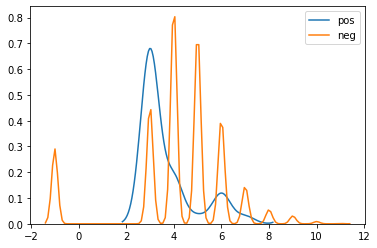

In [232]:
fig, ax = plt.subplots()
t = pairs_df.loc[pairs_df['y'] == True]['shortest distance'].array
f = pairs_df.loc[pairs_df['y'] == False]['shortest distance'].array
sns.kdeplot(t, label = 'pos')
sns.kdeplot(f, label = 'neg')

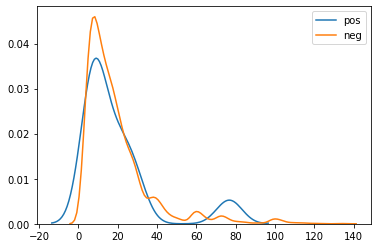

In [233]:
fig, ax = plt.subplots()
t = pairs_df.loc[pairs_df['y'] == True]['Sum of Papers'].array
f = pairs_df.loc[pairs_df['y'] == False]['Sum of Papers'].array
sns.kdeplot(t, label = 'pos')
sns.kdeplot(f, label = 'neg')

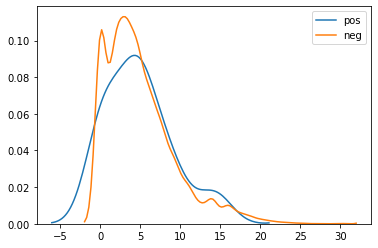

In [236]:
fig, ax = plt.subplots()
t = pairs_df.loc[pairs_df['y'] == True]['Sum of Papers 2'].array
f = pairs_df.loc[pairs_df['y'] == False]['Sum of Papers 2'].array
sns.kdeplot(t, label = 'pos')
sns.kdeplot(f, label = 'neg')

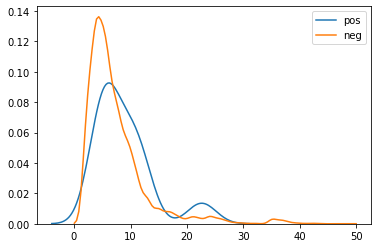

In [237]:
fig, ax = plt.subplots()
t = pairs_df.loc[pairs_df['y'] == True]['Sum of Neighbours'].array
f = pairs_df.loc[pairs_df['y'] == False]['Sum of Neighbours'].array
sns.kdeplot(t, label = 'pos')
sns.kdeplot(f, label = 'neg')

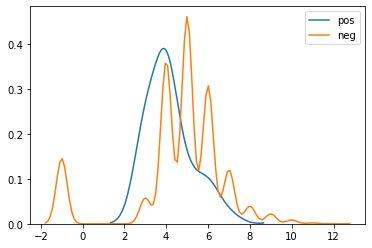

In [238]:
fig, ax = plt.subplots()
t = pairs_df.loc[pairs_df['y'] == True]['second shortest distance'].array
f = pairs_df.loc[pairs_df['y'] == False]['second shortest distance'].array
sns.kdeplot(t, label = 'pos')
sns.kdeplot(f, label = 'neg')

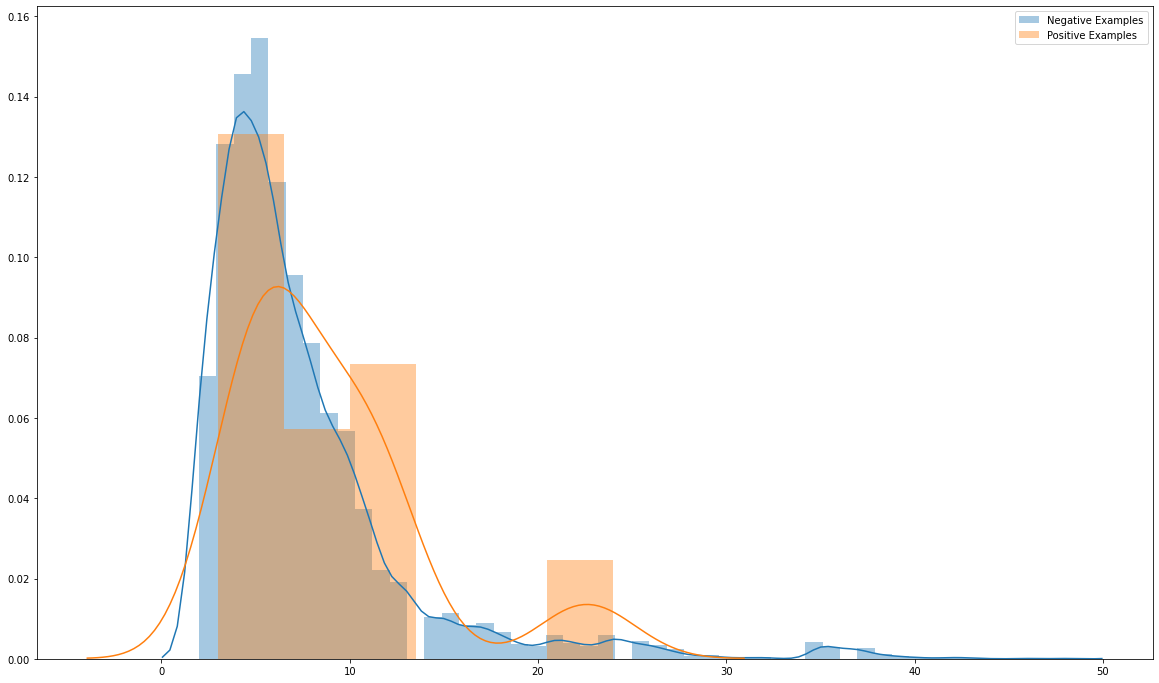

In [239]:
plt.figure(figsize =(20,12))
#g = sns.distplot("shortest distance", hue = 'y',data=pairs_df, alpha = 0.7)
sns.distplot(pairs_df.loc[pairs_df['y'] == False,['Sum of Neighbours']].replace(np.inf, -1), label = 'Negative Examples',
            kde = True, norm_hist = True)
sns.distplot(pairs_df.loc[pairs_df['y'] == True,['Sum of Neighbours']].replace(np.inf, -1), label = 'Positive Examples',
            kde = True, norm_hist = True)
#sns.scatterplot(x="Actual", y="Prediction",data=df_ff3, label = 'Features_fingerprints setting 3')
plt.legend()
plt.show()